# Setting

In [2]:
import torch

# Traninig Process

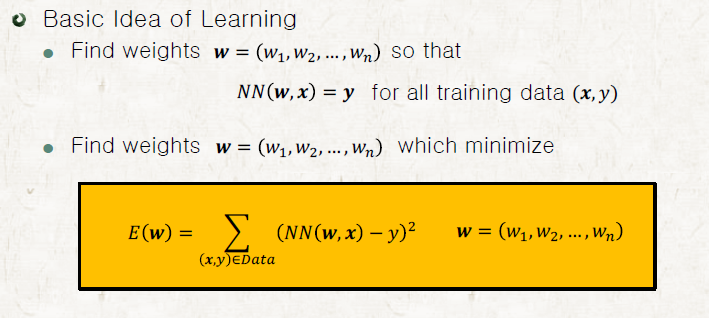

## Dataset

In [3]:
# data
x_train = torch.FloatTensor([[1], [2], [3]]) 
y_train = torch.FloatTensor([[2], [4], [6]])
x_train.shape

torch.Size([3, 1])

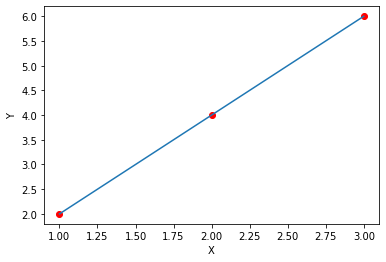

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Simple Neural Net

In [5]:
# initialize model
# actually linear regression
W = torch.zeros(1)

## Prediction

The relationship of y and x would be\
*  f(x) => y = 2 x \

Our model predicts like \

* f(x) => y = w x \

So, our objective is to find out W, which can be fomulated as.. \
 * prediction =  W * x_train 

In [6]:
prediction = W * x_train
prediction.shape

torch.Size([3, 1])

## Loss Computation

### Understanding Loss

Error function = 1 / N * summation ( w * x - y) ** 2

In [7]:
loss = torch.mean((prediction - y_train) ** 2)

In [8]:
import numpy as np

In [9]:
W_l = np.linspace(-5, 7, 1000)
loss_l = []
for W in W_l:
    prediction = W * x_train
    loss = torch.mean((prediction - y_train) ** 2)

    loss_l.append(loss.item())

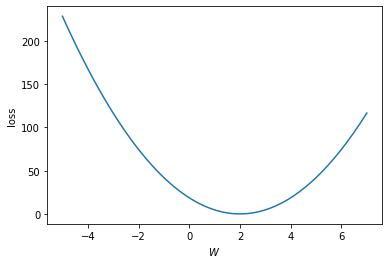

In [10]:
plt.plot(W_l, loss_l)
plt.xlabel('$W$')
plt.ylabel('loss')
plt.show()

## Gradient Computation & Parameter update

### Gradient Descent by hand

d loss / d w = 1 / N * 2x * summation(w*x -y)

In [11]:
# learning rate
lr = 0.1

# d loss / d w
# x_train.shape[0] means num of data
gradient = torch.sum((W * x_train - y_train) * x_train) / x_train.shape[0] 

In [12]:
# data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# initialize model
W = torch.zeros(1)

print(W * x_train - y_train)
print((W * x_train - y_train) * x_train)
print(torch.sum((W * x_train - y_train) * x_train))
print(torch.sum((W * x_train - y_train) * x_train) / x_train.shape[0])

tensor([[-1.],
        [-2.],
        [-3.]])
tensor([[-1.],
        [-4.],
        [-9.]])
tensor(-14.)
tensor(-4.6667)


### Parameter update

In [13]:
# Update W by d loss / d w
W -= lr * gradient

# Put it all together

## Algorithm

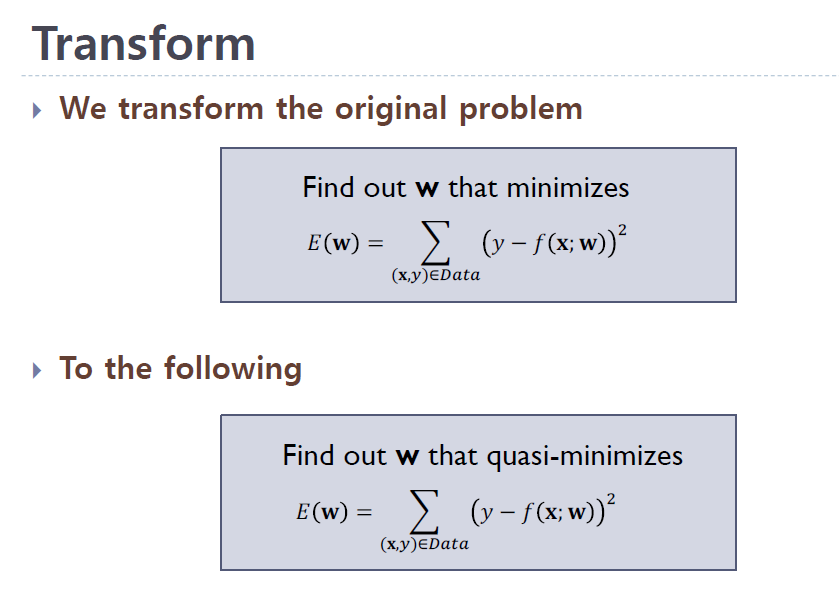

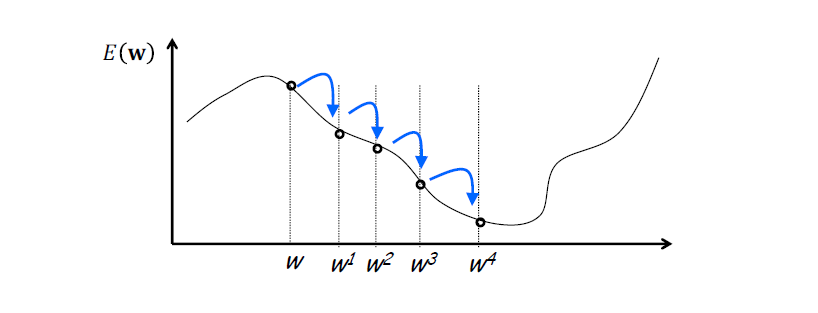

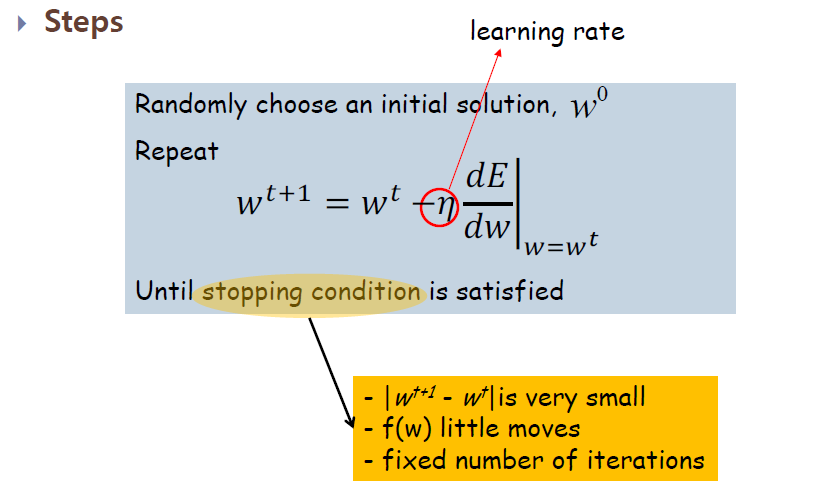

## Implementaion

In [62]:
def forward(weights, x):
    return weights * x

def cal_loss(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

def cal_gradient(weights, x, y):
    return torch.sum((weights * x - y) * x) / x.shape[0]

In [15]:
# data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# initialize model
W = torch.zeros(1)
# learning rate
lr = 0.1
nb_epochs = 10

W_check = []
loss_check = []

print(f"Prediction before training: f(5) = {forward(W, 5).item():.3f}")

for epoch in range(nb_epochs):
    
    # calculate output(prediction)
    prediction = forward(W, x_train)
    
    # calculate loss
    loss = cal_loss(prediction, y_train)

    W_check.append(W.clone())
    loss_check.append(loss)
    
    # calculate gradient 
    gradient = cal_gradient(W, x_train, y_train)

    print('Epoch {:4d}/{} W: {:.3f}, loss: {:.6f}'.format(
        epoch+1, nb_epochs, W.item(), loss.item()
    ))

    # Update W by d loss / d w
    W -= lr * gradient


print(f"Prediction after training: f(5) = {forward(W, 5).item():.3f}")

Prediction before training: f(5) = 0.000
Epoch    1/10 W: 0.000, loss: 18.666666
Epoch    2/10 W: 0.933, loss: 5.309630
Epoch    3/10 W: 1.431, loss: 1.510295
Epoch    4/10 W: 1.697, loss: 0.429595
Epoch    5/10 W: 1.838, loss: 0.122196
Epoch    6/10 W: 1.914, loss: 0.034758
Epoch    7/10 W: 1.954, loss: 0.009887
Epoch    8/10 W: 1.975, loss: 0.002812
Epoch    9/10 W: 1.987, loss: 0.000800
Epoch   10/10 W: 1.993, loss: 0.000228
Prediction after training: f(5) = 9.981


## Visualization

In [16]:
import numpy as np
W_l = np.linspace(-0.25, 3.25, 1000)
loss_l = []
for W in W_l:
    prediction = W * x_train
    loss = torch.mean((prediction - y_train) ** 2)

    loss_l.append(loss.item())

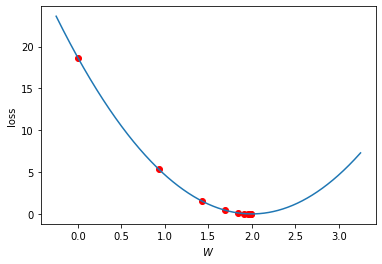

In [17]:
plt.plot(W_l, loss_l)
plt.scatter(torch.tensor(W_check), torch.tensor(loss_check), color='red')
plt.xlabel('$W$')
plt.ylabel('loss')
plt.show()

# Exercise1

Q1. Let's write a pseudo code for implementation. It will not be scored, so please try to write algorithm sentence by sentence

In [18]:
# This is just an example 
 
1. For iteration by epochs
2.    Calculate forward = weights * x
3.    Input forward to prediction
4.    Calculate loss = mean((y_pred - y) ** 2)
5.    Append to model and loss checking list
6.    Calculate cal_gradient
7.    Update W by dloss / dw

#sample

set a hyperparameter or parameter to initialize
1.  initialize model
2.  set learning rate & number of epochs
3.  For iteratiaon by number of epochs
4.    forward pass : compute prediction(model output)
5.    calculate loss (by comparing prediction and your actual y)
5.    backward pass : compute gradient
7.    update weights(parameter of your model)

SyntaxError: ignored

# Using Pytorch Module

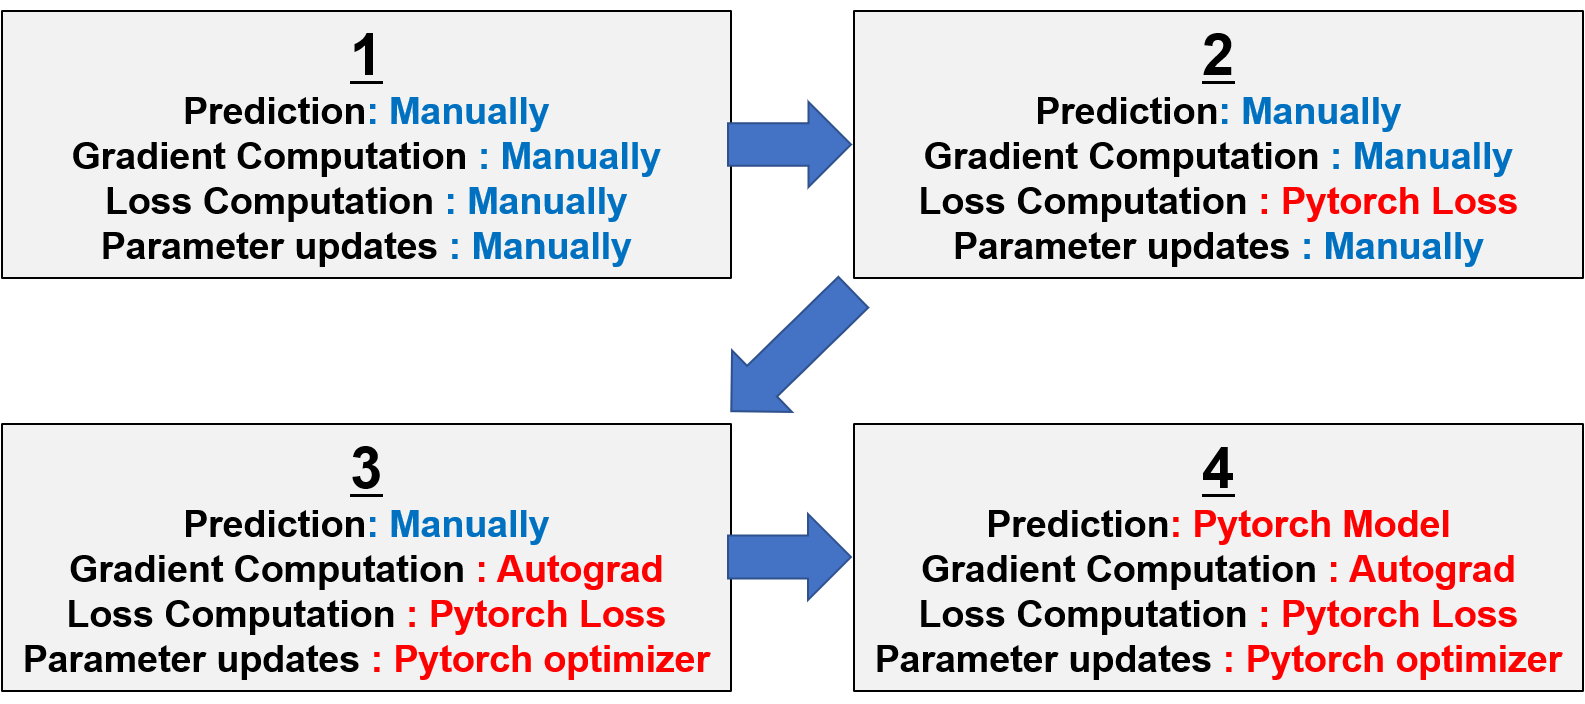

## Dataset

In [19]:
from sklearn.datasets import make_blobs

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, \
                              centers=[[0,0],[1,1],[1,0],[0,1]], \
                              shuffle=True, cluster_std=0.15)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, \
                            centers=[[0,0],[1,1],[1,0],[0,1]], \
                            shuffle=True, cluster_std=0.15)

In [20]:
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [21]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

### How does the dataset look like?

In [22]:
type(x_train)

torch.Tensor

In [23]:
x_train.shape

torch.Size([80, 2])

In [24]:
x_train[:40].shape

torch.Size([40, 2])

In [25]:
x_train[:40, :1].shape

torch.Size([40, 1])

### Visualization

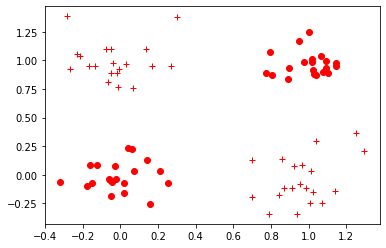

In [26]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

## Prediction

In [27]:
W = torch.zeros((2, 1), requires_grad=True)
prediction = torch.matmul(x_train, W)
print(prediction.shape)
print(y_train.shape)
# squeeze
print(prediction.squeeze().shape)
# unsqueeze
print(y_train.unsqueeze(dim=1).shape)

torch.Size([80, 1])
torch.Size([80])
torch.Size([80])
torch.Size([80, 1])


In [28]:
y_train = y_train.unsqueeze(dim=1)

In [29]:
y_train.shape

torch.Size([80, 1])

In [30]:
def forward(weights, x):
    return torch.matmul(x, weights)

def cal_loss(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

def cal_gradient(weights, x, y):
    return torch.sum(torch.matmul(x.T, torch.matmul(x, weights) - y)) / x.shape[0]

In [31]:
(torch.matmul(x_train, W)).shape

torch.Size([80, 1])

## Loss Computation - torch.nn.Functional

In [32]:
import torch.nn.functional as F
import torch.nn as nn

In [ ]:
#way1

# loss = F.mse_loss(prediction, y_train)

# nn.MSE_loss

#way2

#criterion = nn.MSE_loss()
#loss = criterion(prediction, y_train)

### Test

In [33]:
# learning rate
lr = 0.15
# initialize model
W = torch.zeros((2, 1), requires_grad=True)

nb_epochs = 10
for epoch in range(nb_epochs):
    
    # calculate output(prediction)
    prediction =forward(W, x_train)

    # calculate loss
    loss = F.mse_loss(prediction, y_train)

    # calculate gradient 
    gradient = cal_gradient(W, x_train, y_train)

    print('Epoch {0:4d}/{1} W: {2:<14} loss: {3:.6f}'.format(
        epoch+1, nb_epochs, str([round(x[0], 3) for x in W.tolist()]), loss.item()
    ))

    # update weight(model) by d loss / d w
    W = W - lr * gradient

Epoch    1/10 W: [0.0, 0.0]     loss: 0.500000
Epoch    2/10 W: [0.07, 0.07]   loss: 0.441008
Epoch    3/10 W: [0.126, 0.126] loss: 0.404975
Epoch    4/10 W: [0.169, 0.169] loss: 0.382965
Epoch    5/10 W: [0.202, 0.202] loss: 0.369521
Epoch    6/10 W: [0.229, 0.229] loss: 0.361310
Epoch    7/10 W: [0.249, 0.249] loss: 0.356294
Epoch    8/10 W: [0.265, 0.265] loss: 0.353230
Epoch    9/10 W: [0.278, 0.278] loss: 0.351359
Epoch   10/10 W: [0.288, 0.288] loss: 0.350216


## Gradient Computation & Parameter update - Automatic Gradient Descent

### Autogradient

In [34]:
W = torch.ones(4, requires_grad=True)

for epoch in range (3):
    model_output = (W * 3).sum()

    model_output.backward()

    print(W.grad)

    # W.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


### Optimizer

In [35]:
import torch.optim as optim

In [36]:
optimizer = optim.SGD([W], lr=0.15)

In [37]:
# update weight(model) by d loss / d w
optimizer.zero_grad()
# backward propagation should happend here
optimizer.step() 

### Test

In [38]:
# initialize model
W = torch.zeros((2, 1), requires_grad=True)

# optimizer
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs):
    
    # calculate output(prediction)
    prediction =forward(W, x_train)

    # calculate loss
    loss = F.mse_loss(prediction, y_train)

    print('Epoch {0:4d}/{1} W: {2:<14} loss: {3:.6f}'.format(
        epoch+1, nb_epochs, str([round(x[0], 3) for x in W.tolist()]), loss.item()
    ))

    # calculate gradient 
    # update weight(model) by d loss / d w
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    1/10 W: [0.0, 0.0]     loss: 0.500000
Epoch    2/10 W: [0.07, 0.071]  loss: 0.441004
Epoch    3/10 W: [0.124, 0.127] loss: 0.404968
Epoch    4/10 W: [0.167, 0.17]  loss: 0.382957
Epoch    5/10 W: [0.2, 0.204]   loss: 0.369512
Epoch    6/10 W: [0.226, 0.231] loss: 0.361299
Epoch    7/10 W: [0.247, 0.252] loss: 0.356283
Epoch    8/10 W: [0.262, 0.268] loss: 0.353218
Epoch    9/10 W: [0.275, 0.281] loss: 0.351347
Epoch   10/10 W: [0.284, 0.291] loss: 0.350203


## Neural Net - torch.nn.Module

In [39]:
import torch.nn as nn

In [40]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

In [42]:
model = LinearRegressionModel()

In [43]:
model

LinearRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

sharing parameters with optimizer

In [44]:
optimizer = optim.SGD(model.parameters(), lr=0.15)

In [45]:
next(model.parameters()).tolist()[0]

[-0.010811087675392628, -0.13134998083114624]

### Test

In [46]:
# initialize model
model = LinearRegressionModel()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs):
    
    # calculate output(prediction)
    prediction = model(x_train)

    # calculate loss
    loss = F.mse_loss(prediction, y_train)

    print('Epoch {0:4d}/{1} W: {2:<14} loss: {3:.6f}'.format(
        epoch+1, nb_epochs, str([round(x, 3) for x in next(model.parameters()).tolist()[0]]), loss.item()
    ))

    # calculate gradient 
    # update weight(model) by d loss / d w
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    1/10 W: [0.01, 0.327]  loss: 0.624590
Epoch    2/10 W: [0.092, 0.383] loss: 0.413785
Epoch    3/10 W: [0.132, 0.4]   loss: 0.347393
Epoch    4/10 W: [0.151, 0.397] loss: 0.322891
Epoch    5/10 W: [0.157, 0.384] loss: 0.310964
Epoch    6/10 W: [0.157, 0.367] loss: 0.303178
Epoch    7/10 W: [0.154, 0.347] loss: 0.297063
Epoch    8/10 W: [0.15, 0.328]  loss: 0.291859
Epoch    9/10 W: [0.144, 0.309] loss: 0.287298
Epoch   10/10 W: [0.138, 0.29]  loss: 0.283260


## Activation Fucntion and more

In [47]:
class YourModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(2, 5)
        self.relu = torch.nn.ReLU()
        self.linear_2 = nn.Linear(5, 1)
        
    def forward(self, input_tensor):
        l1 = self.linear_1(input_tensor)
        relu = self.relu(l1)
        output_tensor = self.linear_2(relu)

        return output_tensor

### Test

In [48]:
# initialize model
model = YourModel()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs):
    
    # calculate output(prediction)
    prediction = model(x_train)

    # calculate loss
    loss = F.mse_loss(prediction, y_train)

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} loss: {:.6f}'.format(
            epoch+1, nb_epochs, loss.item()
        ))

    # calculate gradient 
    # update weight(model) by d loss / d w
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    1/1000 loss: 0.279851
Epoch  101/1000 loss: 0.035409
Epoch  201/1000 loss: 0.027897
Epoch  301/1000 loss: 0.026380
Epoch  401/1000 loss: 0.025087
Epoch  501/1000 loss: 0.024238
Epoch  601/1000 loss: 0.023385
Epoch  701/1000 loss: 0.022583
Epoch  801/1000 loss: 0.021832
Epoch  901/1000 loss: 0.021116


# Exercise2

## Q. Build your own model

Restrictions

* You need to have at least four hidden layers.
* You need to place at least two activation function.

Hint
* There are arguments when you initialize. How would you use those variables to make your model?

In [ ]:
[80, 2] x ([2, 5] [5, 10], [10,5], [5, 1]) = [80, 1]

In [65]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            # write your code

            self.linear_1 = nn.Linear(input_size, hidden_size)
            self.relu1 = torch.nn.ReLU()
            self.linear_2 = nn.Linear(hidden_size, 10)
            self.relu2 = torch.nn.ReLU()
            self.linear_3 = nn.Linear(10, 5)
            self.linear_4 = nn.Linear(5, 1)


            
        def forward(self, input_tensor):
            # write your code

            l1 = self.linear_1(input_tensor) 
            relu = self.relu1(l1) 
            l2 = self.linear_2(relu)
            relu = self.relu2(l2)
            l3 = self.linear_3(relu)
            output_tensor = self.linear_4(l3)

            return output_tensor 

In [66]:
# initialize model
input_size = 2 ### need to put some number
hidden_size = 5 # fixed

model = NeuralNet(input_size, hidden_size)

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs):
    
    prediction = model(x_train)

    loss = F.mse_loss(prediction, y_train)

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} loss: {:.6f}'.format(
            epoch+1, nb_epochs, loss.item()
        ))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch    1/10000 loss: 1.022888
Epoch  101/10000 loss: 0.182534
Epoch  201/10000 loss: 0.018749
Epoch  301/10000 loss: 0.014488
Epoch  401/10000 loss: 0.011030
Epoch  501/10000 loss: 0.010332
Epoch  601/10000 loss: 0.009782
Epoch  701/10000 loss: 0.006752
Epoch  801/10000 loss: 0.006294
Epoch  901/10000 loss: 0.005825
Epoch 1001/10000 loss: 0.005358
Epoch 1101/10000 loss: 0.005039
Epoch 1201/10000 loss: 0.004715
Epoch 1301/10000 loss: 0.004487
Epoch 1401/10000 loss: 0.004406
Epoch 1501/10000 loss: 0.004103
Epoch 1601/10000 loss: 0.003827
Epoch 1701/10000 loss: 0.003657
Epoch 1801/10000 loss: 0.003483
Epoch 1901/10000 loss: 0.003111
Epoch 2001/10000 loss: 0.002982
Epoch 2101/10000 loss: 0.002768
Epoch 2201/10000 loss: 0.002885
Epoch 2301/10000 loss: 0.002459
Epoch 2401/10000 loss: 0.002505
Epoch 2501/10000 loss: 0.002405
Epoch 2601/10000 loss: 0.002354
Epoch 2701/10000 loss: 0.002236
Epoch 2801/10000 loss: 0.002207
Epoch 2901/10000 loss: 0.002113
Epoch 3001/10000 loss: 0.002150
Epoch 31

# Check test set

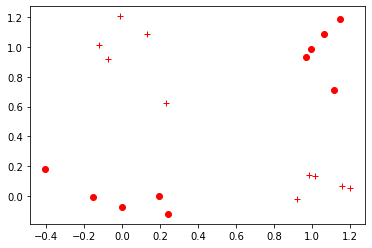

In [58]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ <= 0.5 else c+'+')

plt.figure()
vis_data(x_test, y_test, c='r')
plt.show()

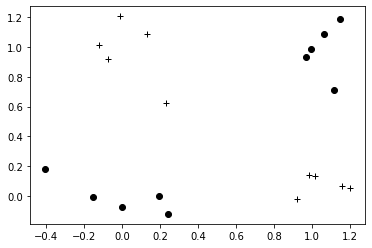

In [59]:
plt.figure()
vis_data(x_test, model(x_test), c='k')
plt.show()

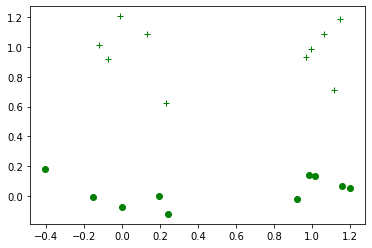

In [60]:
plt.figure()
W = torch.randn((2, 1))
vis_data(x_test, torch.matmul(x_test, W), c='g')
plt.show()

In [61]:
count = 0
for pred, label in zip(y_pred.tolist(), y_test.tolist()):
    if pred[0] > 0.5: pred = 1.0
    else: pred = 0.0

    if pred == label:
        count += 1
    
print(f"We got {count} correct prediciton over {y_test.shape[0]} test set")

NameError: ignored